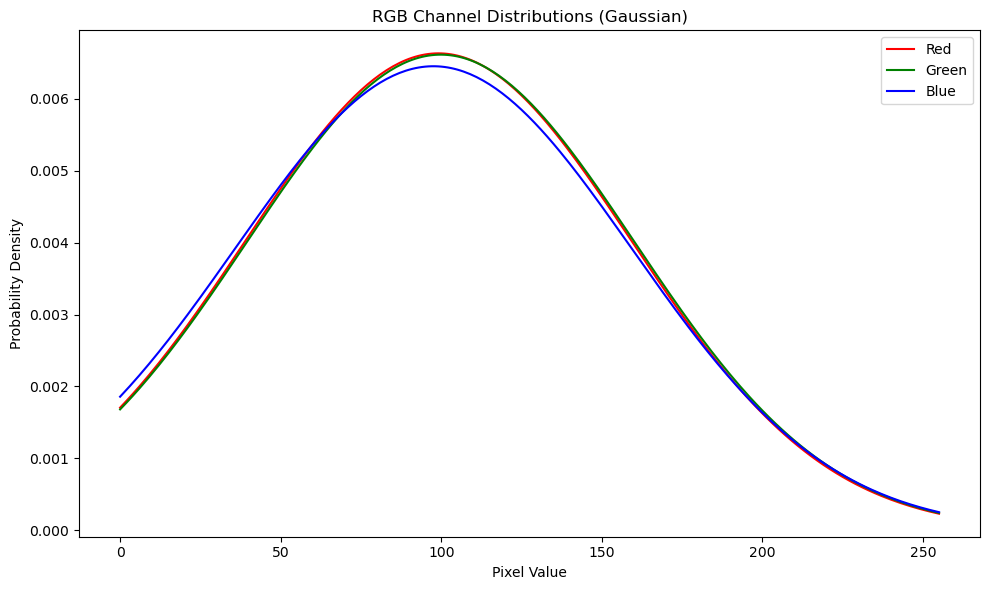

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_rgb_channel_distribution(directory):
    """Function that takes in a directory containing images, and displays the distribution
    of the RGB image channels across all images.

    :param directory: directory containing the images.
    :return:
        None
    """
    # Create lists to hold pixel values for each channel
    red_values = []
    green_values = []
    blue_values = []

    # Iterate over all image files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust the file extension as needed
            image_path = os.path.join(directory, filename)

            # Load the image using OpenCV
            image = cv2.imread(image_path)

            if image is not None:
                # Extract RGB channels
                red_channel = image[:, :, 2].ravel()
                green_channel = image[:, :, 1].ravel()
                blue_channel = image[:, :, 0].ravel()

                # Append pixel values to the respective lists
                red_values.extend(red_channel)
                green_values.extend(green_channel)
                blue_values.extend(blue_channel)

    # Compute mean and standard deviation for each channel
    red_mean, red_std = np.mean(red_values), np.std(red_values)
    green_mean, green_std = np.mean(green_values), np.std(green_values)
    blue_mean, blue_std = np.mean(blue_values), np.std(blue_values)

    # Plot Gaussian distributions for each channel
    x = np.linspace(0, 255, 256)
    red_pdf = norm.pdf(x, red_mean, red_std)
    green_pdf = norm.pdf(x, green_mean, green_std)
    blue_pdf = norm.pdf(x, blue_mean, blue_std)

    plt.figure(figsize=(10, 6))
    plt.plot(x, red_pdf, color='red', label='Red')
    plt.plot(x, green_pdf, color='green', label='Green')
    plt.plot(x, blue_pdf, color='blue', label='Blue')
    plt.title("RGB Channel Distributions (Gaussian)")
    plt.xlabel("Pixel Value")
    plt.ylabel("Probability Density")
    plt.legend()

    # Adjust the layout
    plt.tight_layout()
    plt.savefig('Image_RGB_channel_distribution.png')
    plt.show()

# Call the function with the directory path
plot_rgb_channel_distribution('/Train/train/images')


In [1]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 15.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


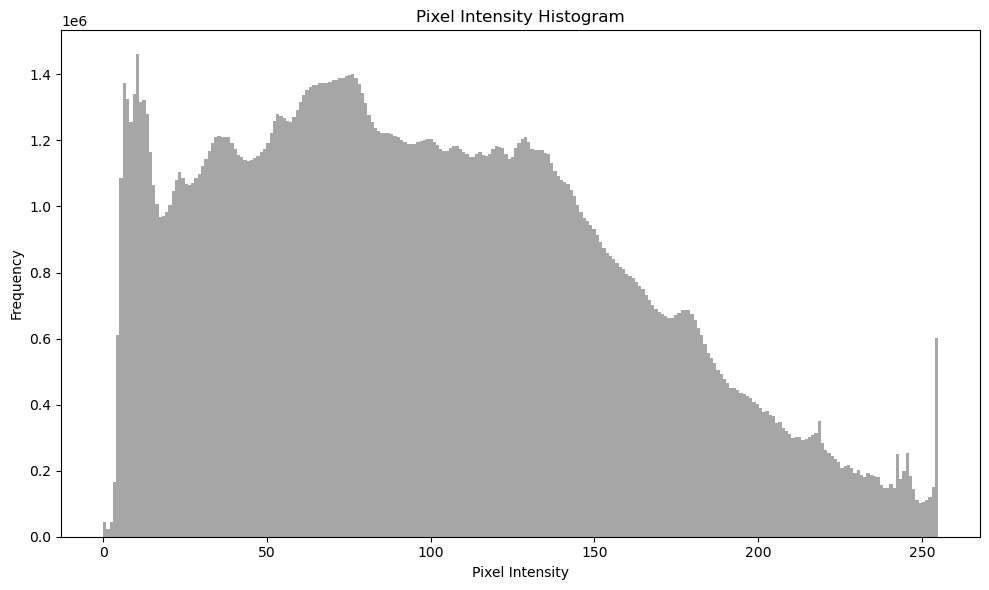

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_pixel_intensity_histogram(directory):
    """Function that takes in a directory containing images, and displays the histogram
    of the pixel intensity values across all images.

    :param directory: directory containing the images.
    :return:
        None
    """
    # Create lists to hold pixel values for each channel
    pixel_values = []

    # Iterate over all image files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust the file extension as needed
            image_path = os.path.join(directory, filename)

            # Load the image using OpenCV
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

            if image is not None:
                # Flatten the image and append pixel values to the list
                pixel_values.extend(image.ravel())

    # Plot histogram for pixel intensities
    plt.figure(figsize=(10, 6))
    plt.hist(pixel_values, bins=256, range=(0, 255), color='gray', alpha=0.7)
    plt.title("Pixel Intensity Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    
    # Adjust the layout
    plt.tight_layout()
    plt.savefig('Pixel_Intensity_Histogram.png')
    plt.show()

# Call the function with the directory path
plot_pixel_intensity_histogram('/Train/train/images')


Class car: 14064 annotations
Class pedestrian: 8844 annotations
Class people: 5125 annotations
Class motor: 4886 annotations
Class bicycle: 1287 annotations
Class tricycle: 1045 annotations
Class van: 1975 annotations
Class awning-tricycle: 532 annotations
Class ignored regions: 1378 annotations
Class truck: 750 annotations
Class bus: 251 annotations
Class others: 32 annotations


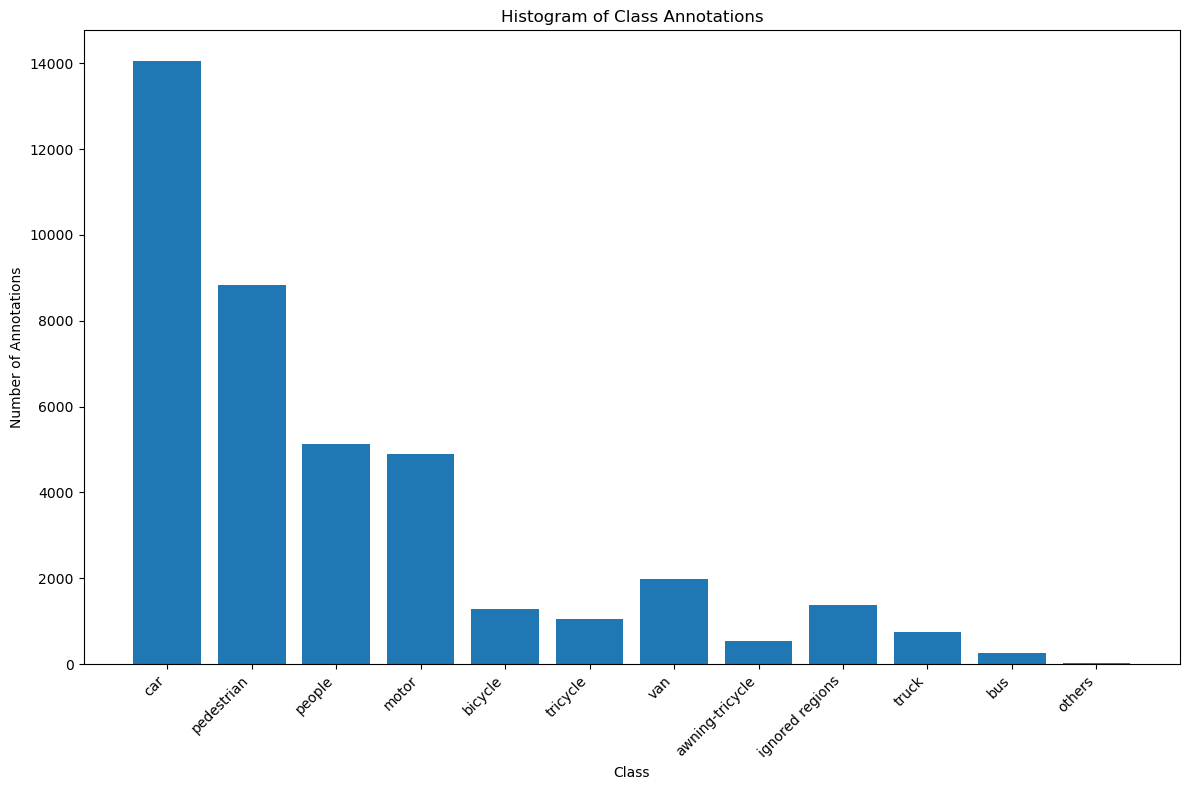

In [6]:
import os
from collections import Counter
import matplotlib.pyplot as plt

CLASSES = [
    "ignored regions", "pedestrian", "people", "bicycle", "car",
    "van", "truck", "tricycle", "awning-tricycle", "bus", "motor", "others"
]

def count_classes_in_annotations(directory):
    """
    Function to count the occurrences of each class in annotation files.
    
    :param directory: Directory containing the annotation txt files.
    :return: A dictionary with class counts.
    """
    class_counter = Counter()
    
    # Iterate over all txt files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):  # Adjust the file extension if needed
            file_path = os.path.join(directory, filename)
            
            # Open and read each file
            with open(file_path, 'r') as file:
                lines = file.readlines()
                
                # Process each line to count classes
                for line in lines:
                    elements = line.strip().split(',')
                    if len(elements) > 5:  # Ensure there are enough elements in the line
                        class_id = int(elements[5])
                        class_counter[class_id] += 1

    return class_counter

def plot_class_histogram(class_counts):
    """
    Function to plot a histogram of class counts.
    
    :param class_counts: Dictionary with class counts.
    :return:
        None
    """
    classes = [CLASSES[int(class_id)] for class_id in class_counts.keys()]
    counts = list(class_counts.values())

    plt.figure(figsize=(12, 8))
    plt.bar(classes, counts)
    plt.xlabel('Class')
    plt.ylabel('Number of Annotations')
    plt.title('Histogram of Class Annotations')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig('class_histogram.png')
    plt.show()

# Example usage
directory_path = '/Val/val/annotations'
class_counts = count_classes_in_annotations(directory_path)

# Print the results
for class_id, count in class_counts.items():
    print(f"Class {CLASSES[int(class_id)]}: {count} annotations")

# Plot the histogram
plot_class_histogram(class_counts)



In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict

def get_image_sizes(directory):
    sizes = defaultdict(int)
    
    for filename in os.listdir(directory):
        if filename.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp')):
            try:
                with Image.open(os.path.join(directory, filename)) as img:
                    size = img.size
                    sizes[size] += 1
            except Exception as e:
                print(f"Error opening image {filename}: {e}")
                
    return sizes

def plot_image_sizes(sizes):
    labels = [f"{size[0]}x{size[1]}" for size in sizes.keys()]
    counts = list(sizes.values())
    
    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts)
    plt.xlabel('Image Size (Width x Height)')
    plt.ylabel('Number of Images')
    plt.title('Number of Images by Size')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def print_image_sizes(sizes):
    for size, count in sizes.items():
        print(f"Size: {size[0]}x{size[1]}, Count: {count}")

# Define the directory containing the images

directory = '/VisDrone2019-DET-train/images'

# Get image sizes
image_sizes = get_image_sizes(directory)

# Print the sizes and their counts
print_image_sizes(image_sizes)

# Plot the sizes
plot_image_sizes(image_sizes)
